In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lf14 as lf
#import iop_ext as iop

In [2]:
# Import NEA masses and radii

nea_output_file= "./data/catalog_exoplanets.dat"

list_catalog_rp, list_catalog_mp = np.genfromtxt(nea_output_file, delimiter="\t",unpack=True, usecols=(1,4), filling_values=0.0)

print("Exoplanet catalog imported successfully.")

Exoplanet catalog imported successfully.


In [3]:
### Import mass-radius models from Li Zeng 2016, iop_ext, TOI-836b planet evolution, and lf14

# Pure iron planet
list_zeng_fe_m, list_zeng_fe_r = np.loadtxt("./models/zeng-iron.dat", unpack=True, usecols=(0,1))

# Earth-like planet
list_zeng_earth_m, list_zeng_earth_r = np.loadtxt("./models/zeng-earth.dat", unpack=True, usecols=(0,1))

# Pure rock planet
list_zeng_rock_m, list_zeng_rock_r = np.loadtxt("./models/zeng-rock.dat", unpack=True, usecols=(0,1))

# 50% Water planet
list_zeng_water_m, list_zeng_water_r = np.loadtxt("./models/Zeng2016.dat", unpack=True, usecols=(0,3))

# 50% Steam planet
import iop_ext as iop
from iop_ext import radius_iop

cmf = .325 #core mass fraction
wmf = .5 #water mass fraction
pmass = np.logspace(np.log10(0.1), np.log10(20.0), 100) #mass of planet
teq = 600 #equilibrium temperature at surface

steamradius = np.array([radius_iop(cmf,wmf,teq,mp) for mp in pmass])
error = np.array([iop.error_iop(cmf,wmf,teq,mp) for mp in pmass])
mask_valid = (error==0)

# lf14 mass-radius relationships (5% hydrogen (H_2)/helium (He), 95% rocky core)
met = 1 # atmospheric metallicity
age = 5.0 # system age
fenv = 5.0 # planet envelope mass fraction
teq2 = 600 #equilibrium temperature at surface
pmass2 = np.logspace(np.log10(0.1), np.log10(20.0), 100)

lfradii = np.array([lf.radius_lf14(met,age,fenv,teq2,mp2) for mp2 in pmass2])

# Planet evolution
evo_toi836b_m, evo_toi836b_r, = np.loadtxt("./data/evolution_TOI-836b_JJ.dat", unpack=True, usecols=(1,2))
evo_kepler138c_m, evo_kepler138c_r, = np.loadtxt("./data/evolution_Kepler-138c_JJ.dat", unpack=True, usecols=(1,2))
evo_k23c_m, evo_k23c_r, = np.loadtxt("./data/evolution_K2-3c_JJ.dat", unpack=True, usecols=(1,2))
evo_toi178b_m, evo_toi178b_r, = np.loadtxt("./data/evolution_TOI-178b_JJ.dat", unpack=True, usecols=(1,2))
print("Mass-radius data curves imported successfully")

Mass-radius data curves imported successfully


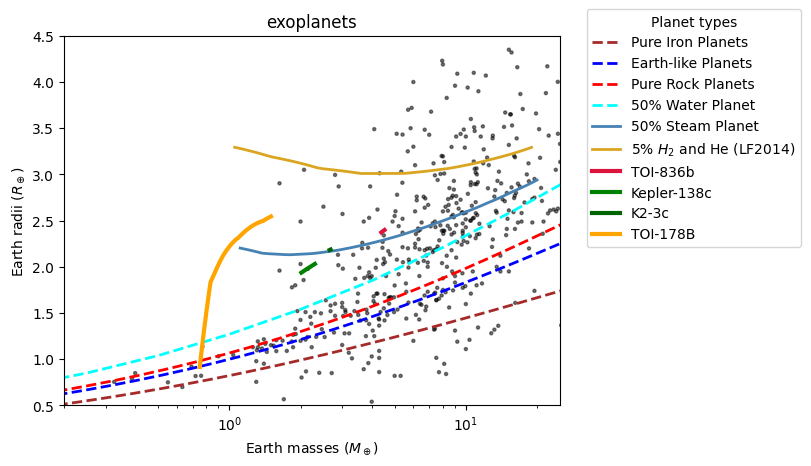

In [4]:
# Make the plot

N_exo = len(list_catalog_mp) #Length/number of data fvalues in list_catalog_mp
point_sizes = np.ones(N_exo)*5.0 #size of each planet

#plot exoplanets
plt.scatter(list_catalog_mp,list_catalog_rp, color="black", alpha = 0.5, sizes=point_sizes)

#plot the models

# Li Zeng 2016
plt.plot(list_zeng_fe_m, list_zeng_fe_r, color="brown", linestyle="--", linewidth=2, label="Pure Iron Planets")
plt.plot(list_zeng_earth_m, list_zeng_earth_r, color="blue", linestyle="--", linewidth=2, label="Earth-like Planets")
plt.plot(list_zeng_rock_m, list_zeng_rock_r, color="red", linestyle="--", linewidth=2, label="Pure Rock Planets")
plt.plot(list_zeng_water_m, list_zeng_water_r, color="cyan", linestyle="--", linewidth=2, label="50% Water Planet")

# iop model
plt.plot(pmass[mask_valid], steamradius[mask_valid], color="steelblue", linestyle="-", linewidth=2, label="50% Steam Planet")

# LF 2014
plt.plot(pmass2, lfradii, color="goldenrod", linestyle="-", linewidth=2, label=r"5% $H_2$ and He (LF2014)")

# Evolution simulation
plt.plot(evo_toi836b_m, evo_toi836b_r, color="crimson", linestyle="-", linewidth=3, label="TOI-836b")
plt.plot(evo_kepler138c_m, evo_kepler138c_r, color="green", linestyle="-", linewidth=3, label="Kepler-138c") #potentially wrong
plt.plot(evo_k23c_m, evo_k23c_r, color="darkgreen", linestyle="-", linewidth=3, label="K2-3c")
plt.plot(evo_toi178b_m, evo_toi178b_r, color="orange", linestyle="-", linewidth=3, label="TOI-178B")
#Figure details
plt.xscale('log') #put the x-axis in log scale
plt.xlim(.2,25) #domain
plt.ylim(.5,4.5) #range

#Label the figure
plt.title('exoplanets')
plt.xlabel('Earth masses ($M_\\oplus$)')
plt.ylabel('Earth radii ($R_\\oplus$)')
plt.legend(loc="center right", title="Planet types", bbox_to_anchor=(1.5,.75))

plt.show()

In [5]:
print(pmass2)

[ 0.1         0.10549764  0.11129751  0.11741624  0.12387136  0.13068136
  0.13786574  0.1454451   0.15344114  0.16187678  0.17077617  0.18016482
  0.19006963  0.20051896  0.21154277  0.22317262  0.23544184  0.24838557
  0.2620409   0.27644696  0.29164501  0.30767859  0.32459363  0.34243861
  0.36126464  0.38112565  0.40207855  0.42418337  0.44750342  0.47210553
  0.49806018  0.52544171  0.55432858  0.58480355  0.61695392  0.6508718
  0.68665436  0.72440411  0.76422921  0.80624375  0.8505681   0.89732923
  0.94666113  0.99870511  1.05361028  1.11153393  1.17264202  1.23710961
  1.30512139  1.37687221  1.45256763  1.53242451  1.61667163  1.70555034
  1.79931529  1.89823509  2.00259314  2.11268842  2.22883634  2.35136964
  2.48063938  2.6170159   2.7608899   2.91267357  3.07280176  3.24173321
  3.41995189  3.60796839  3.80632136  4.01557904  4.23634095  4.46923955
  4.71494206  4.97415241  5.24761319  5.53610785  5.8404629   6.16155028
  6.50028987  6.85765214  7.23466087  7.63239618  8.

In [6]:
print(mask_valid)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
